In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xining
Processing Record 2 of Set 1 | nouadhibou
Processing Record 3 of Set 1 | tiarei
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | lethem
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | severo-yeniseyskiy
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | porto velho
Processing Record 15 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | staraya mayna
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | monrovia
Processing Record 21 of Set 1 

Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | lujiang
Processing Record 43 of Set 4 | atbasar
Processing Record 44 of Set 4 | yacuiba
Processing Record 45 of Set 4 | indramayu
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | mogadishu
Processing Record 48 of Set 4 | gilgit
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | pomabamba
Processing Record 1 of Set 5 | mahibadhoo
Processing Record 2 of Set 5 | nordfjordeid
Processing Record 3 of Set 5 | manadhoo
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | pout
Processing Record 6 of Set 5 | chanika
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 | bonthe
Processing Record 10 of Set 5 | marathon
Processing Record 11 of Set 5 | diamantino
Processing Record 12 of Set 5 | coos bay
Processing Record 13 of Set 5 | buala
Processing Record 14 of Set 5 | attawapiskat
City not found

Processing Record 29 of Set 8 | turukhansk
Processing Record 30 of Set 8 | tanete
Processing Record 31 of Set 8 | usinsk
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | ilulissat
Processing Record 34 of Set 8 | itaquyry
Processing Record 35 of Set 8 | pokhara
Processing Record 36 of Set 8 | kottapalli
Processing Record 37 of Set 8 | nanortalik
Processing Record 38 of Set 8 | bessemer
Processing Record 39 of Set 8 | srandakan
Processing Record 40 of Set 8 | erzurum
Processing Record 41 of Set 8 | stokmarknes
Processing Record 42 of Set 8 | delemont
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | tomaszow lubelski
Processing Record 45 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 46 of Set 8 | chifeng
Processing Record 47 of Set 8 | qasigiannguit
Processing Record 48 of Set 8 | tazovskiy
Processing Record 49 of Set 8 | mount isa
Processing Record 50 of Set 8 | hauterive
Processing Record 1 of Set 9 | port-cartier
Proce

Processing Record 11 of Set 12 | bilma
Processing Record 12 of Set 12 | mehamn
Processing Record 13 of Set 12 | rustenburg
Processing Record 14 of Set 12 | atlantic city
Processing Record 15 of Set 12 | dubrovnik
Processing Record 16 of Set 12 | damaturu
Processing Record 17 of Set 12 | koubia
Processing Record 18 of Set 12 | anqing
Processing Record 19 of Set 12 | oriximina
Processing Record 20 of Set 12 | hikone
Processing Record 21 of Set 12 | cam ranh
Processing Record 22 of Set 12 | povenets
Processing Record 23 of Set 12 | shetpe
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | gushikawa
Processing Record 26 of Set 12 | saint-francois
Processing Record 27 of Set 12 | luau
Processing Record 28 of Set 12 | san juan
Processing Record 29 of Set 12 | tigre
Processing Record 30 of Set 12 | tolaga bay
Processing Record 31 of Set 12 | aguimes
Processing Record 32 of Set 12 | porbandar
Processing Record 33 of Set 12 | orebro
Processing Record 34 of Set 12 | po

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xining,36.6167,101.7667,22.33,46,87,2.30,CN,2021-12-14 20:49:10
1,Nouadhibou,20.9310,-17.0347,66.18,77,0,14.97,MR,2021-12-14 20:51:08
2,Tiarei,-17.5333,-149.3333,84.22,76,14,10.18,PF,2021-12-14 20:51:08
3,Coquimbo,-29.9533,-71.3436,67.73,55,0,13.80,CL,2021-12-14 20:46:18
4,Lebu,-37.6167,-73.6500,59.56,67,0,14.05,CL,2021-12-14 20:48:10
5,Lethem,3.3803,-59.7968,85.10,66,100,11.10,GY,2021-12-14 20:51:09
6,Sinnamary,5.3833,-52.9500,78.53,87,100,8.10,GF,2021-12-14 20:51:09
7,Iqaluit,63.7506,-68.5145,-4.27,71,75,9.22,CA,2021-12-14 20:51:09
8,Severo-Yeniseyskiy,60.3725,93.0408,-25.08,99,21,3.42,RU,2021-12-14 20:51:10
9,Tuktoyaktuk,69.4541,-133.0374,-16.60,69,90,5.75,CA,2021-12-14 20:51:10


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xining,CN,2021-12-14 20:49:10,36.6167,101.7667,22.33,46,87,2.30
1,Nouadhibou,MR,2021-12-14 20:51:08,20.9310,-17.0347,66.18,77,0,14.97
2,Tiarei,PF,2021-12-14 20:51:08,-17.5333,-149.3333,84.22,76,14,10.18
3,Coquimbo,CL,2021-12-14 20:46:18,-29.9533,-71.3436,67.73,55,0,13.80
4,Lebu,CL,2021-12-14 20:48:10,-37.6167,-73.6500,59.56,67,0,14.05
5,Lethem,GY,2021-12-14 20:51:09,3.3803,-59.7968,85.10,66,100,11.10
6,Sinnamary,GF,2021-12-14 20:51:09,5.3833,-52.9500,78.53,87,100,8.10
7,Iqaluit,CA,2021-12-14 20:51:09,63.7506,-68.5145,-4.27,71,75,9.22
8,Severo-Yeniseyskiy,RU,2021-12-14 20:51:10,60.3725,93.0408,-25.08,99,21,3.42
9,Tuktoyaktuk,CA,2021-12-14 20:51:10,69.4541,-133.0374,-16.60,69,90,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
# Reload dataframe to read again so as to not run scripts again
import_data_file = 'weather_data/cities.csv'

city_data_df = pd.read_csv(import_data_file)

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

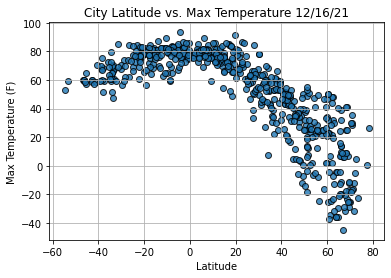

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

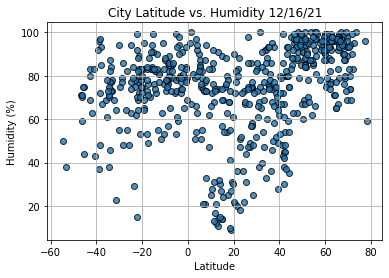

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

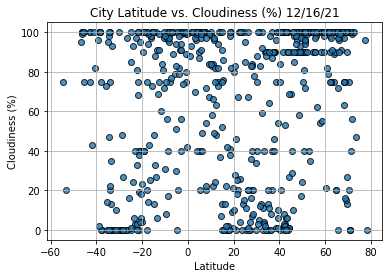

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

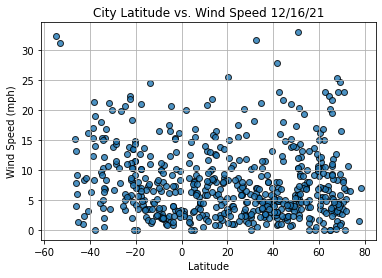

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

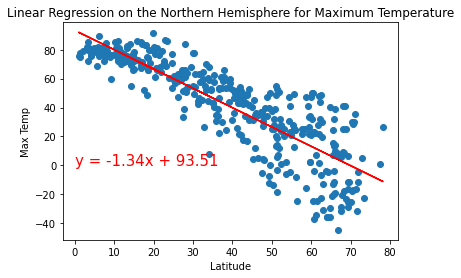

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,0))

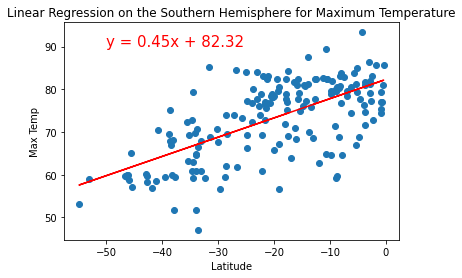

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

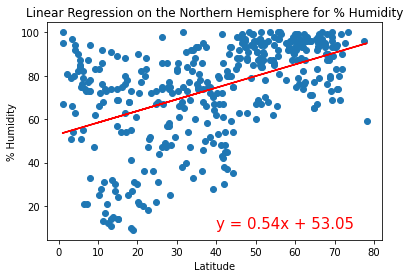

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

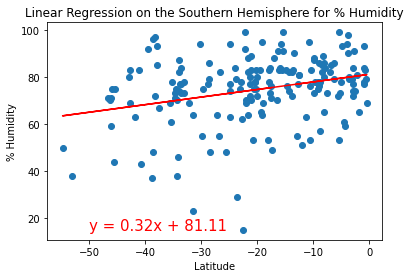

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

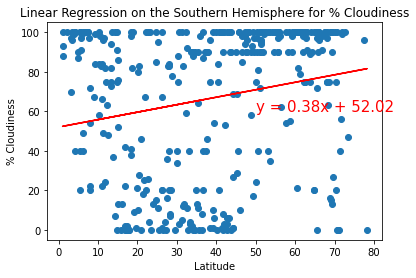

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(50,60))

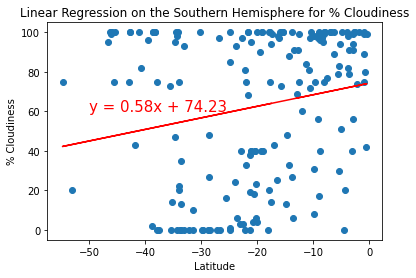

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

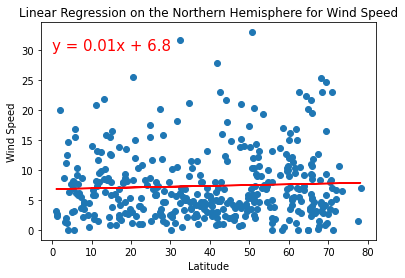

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30))

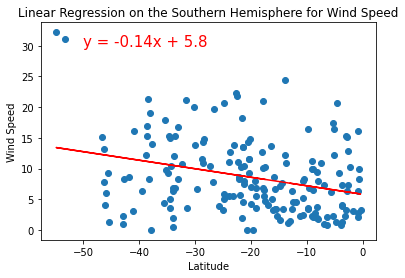

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))